Epoch 1/50
125/125 [==============================] - 0s 831us/step - loss: 2.0034 - accuracy: 0.3345
Epoch 2/50
125/125 [==============================] - 0s 785us/step - loss: 1.1944 - accuracy: 0.6599
Epoch 3/50
125/125 [==============================] - 0s 764us/step - loss: 0.9445 - accuracy: 0.7057
Epoch 4/50
125/125 [==============================] - 0s 771us/step - loss: 0.8237 - accuracy: 0.7481
Epoch 5/50
125/125 [==============================] - 0s 769us/step - loss: 0.7854 - accuracy: 0.7467
Epoch 6/50
125/125 [==============================] - 0s 795us/step - loss: 0.7165 - accuracy: 0.7650
Epoch 7/50
125/125 [==============================] - 0s 770us/step - loss: 0.6718 - accuracy: 0.7798
Epoch 8/50
125/125 [==============================] - 0s 801us/step - loss: 0.6585 - accuracy: 0.7877
Epoch 9/50
125/125 [==============================] - 0s 771us/step - loss: 0.6238 - accuracy: 0.7978
Epoch 10/50
125/125 [==============================] - 0s 794us/step - loss: 0.601

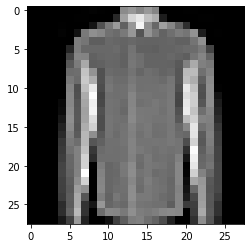

Label:  6.0
Prediction:  6
[3.2416440e-04 1.5637164e-04 1.5892772e-02 2.9158026e-03 5.6207560e-02
 7.4141877e-05 9.2323446e-01 3.8032712e-07 1.1926326e-03 1.8555905e-06]


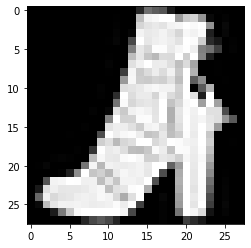

Label:  9.0
Prediction:  9
[2.7553170e-04 1.6584809e-04 1.3532068e-03 3.5024427e-03 7.5253437e-04
 3.2440345e-03 7.5771580e-03 1.8787086e-01 1.0464633e-03 7.9421192e-01]


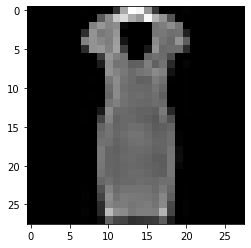

Label:  3.0
Prediction:  3
[2.8930202e-03 1.1670409e-02 3.2105700e-03 9.7750413e-01 2.3057703e-03
 2.4938297e-05 1.9391911e-03 4.1525025e-05 2.3240097e-04 1.7815216e-04]


<Figure size 432x288 with 0 Axes>

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import elice_utils
# eu = elice_utils.EliceUtils()

# seed를 고정하는 코드입니다.
# 정확한 채점을 위하여 값을 변경하지 마세요!
np.random.seed(101)
tf.random.set_seed(101)



def ANN_classifier(x_train, y_train):

    '''
    지시사항 1번
    인공 신경망 분류 모델을 생성합니다.
    '''
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        
    ])
    
    
    
    '''
    지시사항 2번
    model 을 학습시킬 `optimizer`와 `loss`를 다음과 같이 설정하세요.
    '''
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    '''
    지시사항 3번
    학습할 `epochs` 값을 설정하여 train 데이터에 대한 학습을 진행합니다.
    '''
    model.fit(x_train, y_train, epochs=50)

    return model
    
def main():
    
    x_train = np.loadtxt('./data/train_images.csv', delimiter =',', dtype = np.float32)
    y_train = np.loadtxt('./data/train_labels.csv', delimiter =',', dtype = np.float32)
    x_test = np.loadtxt('./data/test_images.csv', delimiter =',', dtype = np.float32)
    y_test = np.loadtxt('./data/test_labels.csv', delimiter =',', dtype = np.float32)

    
    # 이미지 데이터를 0~1범위의 값으로 바꾸어 줍니다.
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    model = ANN_classifier(x_train,y_train)
    
    # 학습한 모델을 test 데이터를 활용하여 평가합니다.
    loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print('\n- TEST 정확도 :', test_acc)
    
    # 임의의 3가지 test data의 이미지와 레이블값을 출력하고 예측된 레이블값 출력
    predictions = model.predict(x_test)
    rand_n = np.random.randint(100, size=3)

    for i in rand_n:
        img = x_test[i].reshape(28,28)
        plt.imshow(img,cmap="gray")
        plt.show()
        plt.savefig("test.png")
#         eu.send_image("test.png")

        print("Label: ", y_test[i])
        print("Prediction: ", np.argmax(predictions[i]))
        print(predictions[i])
        
    
if __name__ == "__main__":
    main()

